In [1]:
# Import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head() #ternyata setelah dilhat filenya, tidak ada yang masih dalam bentuk string (sudah di encode) 
#maka tidak perlu kita lakukan encoding

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Define Problem
Setelah kita memilih datasets, kita akan menentukan permasalahan yang akan kita coba pecahkan.
Penyakit jantung merupakan penyakit yang tidak bisa diabaikan, tetapi banyak sekali orang yang masih tidak paham gejala nya, dan menganggap sebagai penyakit biasa, akibatnya mereka terlambat. Walaupun penyakit ini biasanya diderita orang-orang yang berumur 60 tahun keatas(tetapi belum tentu juga 60 tahun keatas pasti terkena penyakit jantung), dan ada kemungkinan juga bahwa anak muda bisa terkena penyakit jantung.
Menurut WHO, 17,9 juta orang meninggal akibat penyakit jantung setiap tahunnya, dan diperkirakan pada tahun 2030 akan ada 23,6 juta orang yang meninggal akibat penyakit jantung. 

src : 
1. https://lifepack.id/bahaya-penyakit-jantung-di-usia-muda/#:~:text=Menurut%20WHO%2C%2017%2C9%20juta,yang%20meninggal%20akibat%20penyakit%20jantung.
2. https://health.kompas.com/read/2020/02/06/140200168/hati-hati-ini-11-tanda-penyakit-jantung-yang-kerap-diabaikan?page=all

## Goals
Tujuan Machine Learning ini adalah menentukan seseorang terkena penyakit jantung / tidak.

![title](heart.png)

In [6]:
## Data Exploration / Cleaning
df.info() #melihat info data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isna().sum() #Tidak ada nan jadi tidak perlu drop / fill 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Setelah kita melihat informasi2 dari data diatas, kita akan mengecek apakah data ini imbalance atau tidak.

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

dari data diatas bisa dilihat bahwa tidak timpang sebelah. dimana target yang 1(didiagnosa terkena penyakit jantung) dan yang 0 (tidak terkena) tidak timpang sebelah. kurang lebih sama. Maka bisa disimpulkan bahwa data disini balance

# Exploratory Data Analysis & Data Visualization

Sebelum kita melakukan Machine Learning Modelling, kita akan melakukan EDA yang berfungsi untuk menambah wawasan kita (mengerti datanya lebih dulu)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
((df[['cp', 'target']].groupby(['cp']).mean())*100).sort_values(by=['target'],ascending=False)

,target
cp,
1,82.000000
2,79.310345
3,69.565217
0,27.272727


Jika kita lihat dari data diatas menggunakan crosstab dari CP(chest pain) target yg memiliki chance tinggi terkena penyakit jantung adalah 1. yaitu asymptotic di angka 82%

In [21]:
(df[['sex', 'target']].groupby(['sex']).mean())*100

,target
sex,
0,75.000000
1,44.927536


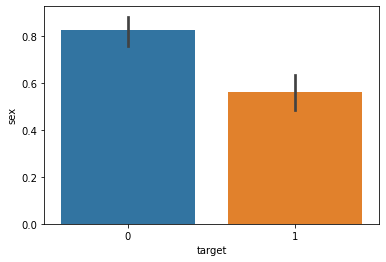

In [56]:
sns.barplot(df['target'],df['sex'])
plt.show()

Perempuan lebih mempunyai tingkat resiko terkena penyakit jantung. yaitu sebesar 75%.
disini saya juga menemukan berita bahwa ternyata benar, wanita lebih rentan terkena penyakit jantung

src : https://sains.kompas.com/read/2019/12/16/193300023/kenapa-wanita-lebih-rentan-mengidap-penyakit-jantung?page=all#:~:text=Namun%2C%20data%20menunjukkan%20bahwa%20wanita,hanya%22%201%2C3%20persen.

In [24]:
df['age'].value_counts() #dr sini saya ingin mengetahui kira2 range umur berapa yang ada di dataset ini 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

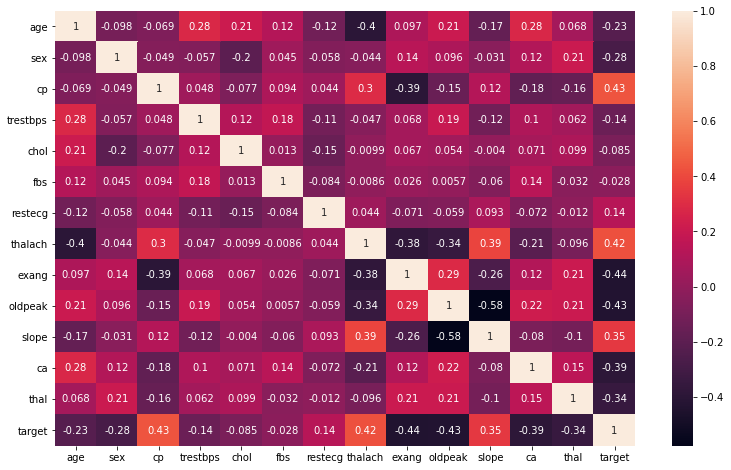

In [27]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

dari sini bisa diliat korelasi nya cukup merata. dan bisa dilihat walaupun chol dan fbs cukup jauh tetapi kita tetap membutuhkan nya, karna bisa dikatakan tingkat kolesterol dan tingkat kadar gula tinggi, bisa menyebabkan seseorang terkena penyakit jantung.

src : 
1. https://health.kompas.com/read/2020/09/27/180300268/mengapa-kolesterol-tinggi-dapat-menyebabkan-penyakit-jantung-?page=all
2. https://www.halodoc.com/artikel/diabetes-sebabkan-serangan-jantung-ini-alasannya

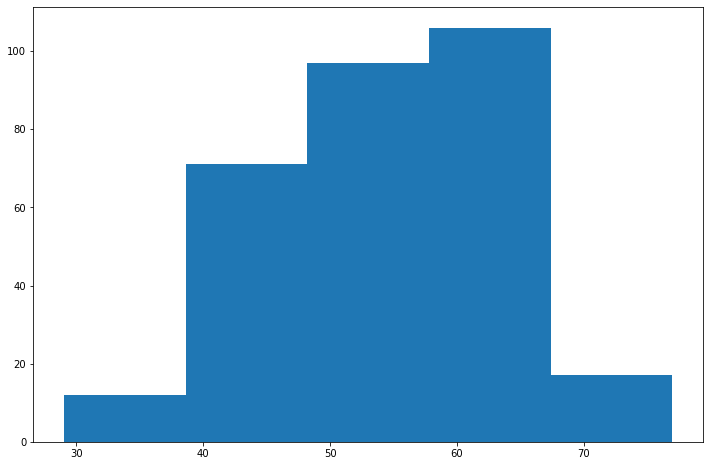

In [33]:
plt.figure(figsize=(12,8))
plt.hist(df['age'],bins=5)
plt.show() #dari sini saya melakukan pengelompokan menjadi 10, dan dari sini ternyata umur 58-66 ada lebih dari 100 orang

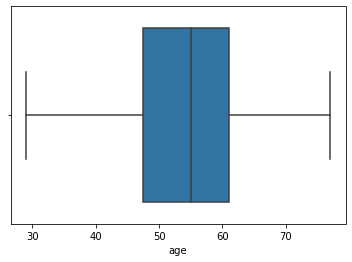

In [37]:
sns.boxplot(df['age']) #tidak ada outliers dari data umur

In [65]:
Q3 = df.describe()['thalach']['75%']
Q1 = df.describe()['thalach']['25%']

In [66]:
IQR = Q3-Q1
IQR

32.5

In [67]:
UpperFence = Q3 + (1.5*IQR)

UpperFence

214.75

In [68]:
LowerFence = Q1 - (1.5*IQR)

LowerFence

84.75

In [69]:
outliers = df[(df['thalach'] < LowerFence) | (df['thalach'] > UpperFence)]

outliers.sort_values(by= 'thalach', ascending=False).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


#### Disini ternyata kita memiliki outlier dibagian thalach / Max HR (maximum heart rate achieved). ternyata dia di angka 71. 

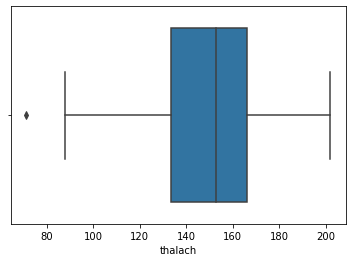

In [70]:
sns.boxplot(df['thalach'])
plt.show()

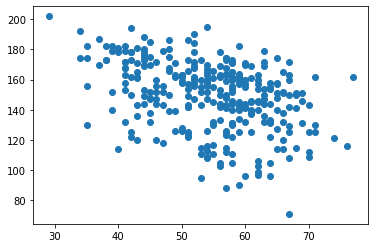

In [78]:
plt.scatter(df['age'],df['thalach'])
plt.show() #dari sini bisa dilihat bahwa umur 29 mempunyai tingkat MaxHR sangat tinggi di angka 202

In [77]:
df[df['age']==29] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


dapat dipastikan jika dilihat bahwa umur 29 yg mempunyai MaxHR tinggi itu terkena penyakit jantung

In [84]:
df[df['thalach']<=110] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0


ternyata dari sini bisa dilihat bahwa MaxHR dibawah 110 itu mempunyai chance yang tinggi untuk tidak terkena penyakit jantung.
walaupun masih ada 1 yg terkena. (tapi jika dilihat perbandingan, perbandingannya adalah 16(aman):2 (terkena penyakit jantung)

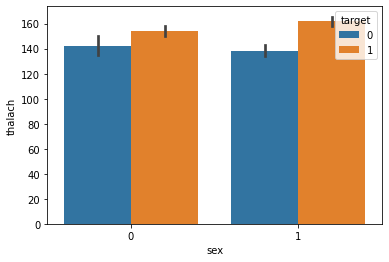

In [87]:
sns.barplot(df['sex'],df['thalach'],hue=df['target']) 

Dari data diatas bisa dilihat bahwa ternyata wanita, yang terdeteksi terkena penyakit jantung ada sekitar 150. 
dan lelaki (1), krg lebih di angka 160an

In [116]:
df[df['ca']==2]['target'].value_counts()

0    31
1     7
Name: target, dtype: int64

In [118]:
df[df['ca']==3]['target'].value_counts()

0    17
1     3
Name: target, dtype: int64

Dari data diatas, bisa kita simpulkan bahwa memiliki CA (Number of Major Vessel coloured by flourosopy) di angka 2 maupun 3 mempunyai chance lumayan tinggi untuk tidak mendapatkan penyakit jantung. 